### Questão (a)
Aplique uma rede MLP com uma camada intermediária e analise (1) a acurácia e (2) a matriz de confusão para
os dados de teste obtidas pela melhor versão desta rede. Descreva a metodologia e a arquitetura empregada,
bem como todas as escolhas feitas.

In [2]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.utils import to_categorical

from medmnist import BloodMNIST

2024-05-13 15:42:30.676335: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-13 15:42:31.364829: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/toffanetto/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [27]:
# Importing data

INPUT_N = 28

train_dataset = BloodMNIST(split="train", download=True, size=INPUT_N)

X_train_full = np.zeros([len(train_dataset), INPUT_N, INPUT_N, 3]) 

y_train_full = np.zeros([len(train_dataset), 1])

for i in range(len(train_dataset)):
    x, y_train_full[i] = train_dataset[i]
    X_train_full[i] = np.array(x)/255.0
    
i_val = int(len(train_dataset)*0.7)

X_train = X_train_full[:i_val]
y_train = y_train_full[:i_val]

X_val = X_train_full[i_val:]
y_val = y_train_full[i_val:]

print('Number of samples in train dataset: '+str(len(train_dataset)))

print('Shape of data in train dataset: '+str(X_train.shape)+" "+str(y_train.shape))

print('Shape of data in validation dataset: '+str(X_val.shape)+" "+str(y_val.shape))

test_dataset = BloodMNIST(split="test", download=True, size=INPUT_N)

X_test = np.zeros([len(test_dataset), INPUT_N, INPUT_N, 3])

y_test = np.zeros([len(test_dataset), 1])

for i in range(len(test_dataset)):
    x, y_test[i] = test_dataset[i]
    X_test[i] = np.array(x)/255.0

print('Number of samples in test dataset: '+str(len(test_dataset)))

print('Shape of data in test dataset: '+str(X_test.shape)+" "+str(y_test.shape))

classes_labels = ['Basófilos - 0', 'Eosinófilos - 1', 'Eritroblastos - 2', 'Granulócitos imaturos - 3',
                  'Linfócitos - 4', 'Monócitos - 5', 'Neutrófilos - 6', 'Plaquetas - 7']


Using downloaded and verified file: /home/toffanetto/.medmnist/bloodmnist.npz
Number of samples in train dataset: 11959
Shape of data in train dataset: (8371, 28, 28, 3) (8371, 1)
Shape of data in validation dataset: (3588, 28, 28, 3) (3588, 1)
Using downloaded and verified file: /home/toffanetto/.medmnist/bloodmnist.npz
Number of samples in test dataset: 3421
Shape of data in test dataset: (3421, 28, 28, 3) (3421, 1)


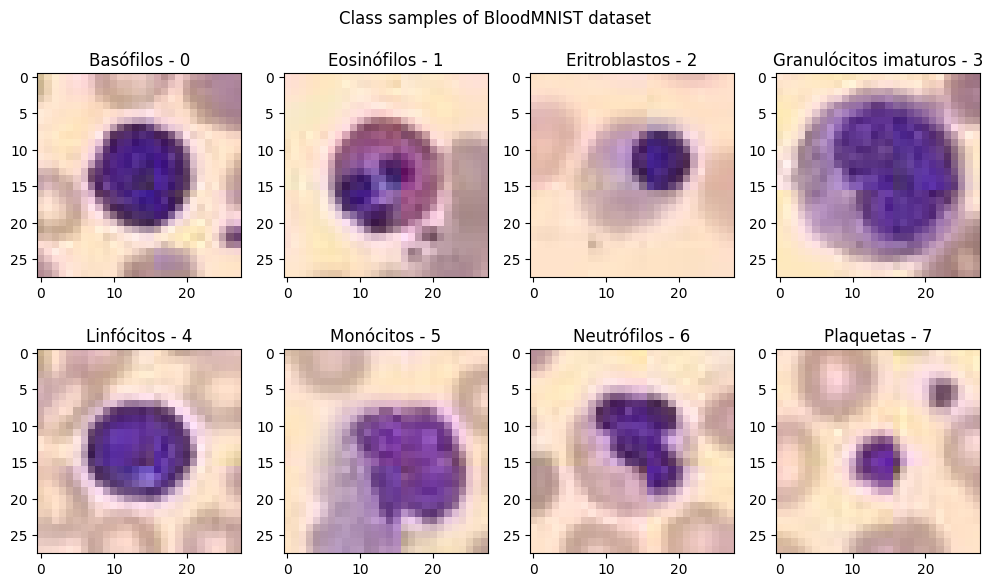

In [28]:
y_train_list = y_train[:,0].tolist()

class_samples = [y_train_list.index(i) for i in range(8)]

plt.figure(figsize=(10,6))
plt.subplot(2,4,1)
plt.imshow(X_train[class_samples[0]])
plt.title(classes_labels[0])
plt.subplot(2,4,2)
plt.imshow(X_train[class_samples[1]])
plt.title(classes_labels[1])
plt.subplot(2,4,3)
plt.imshow(X_train[class_samples[2]])
plt.title(classes_labels[2])
plt.subplot(2,4,4)
plt.imshow(X_train[class_samples[3]])
plt.title(classes_labels[3])
plt.subplot(2,4,5)
plt.imshow(X_train[class_samples[4]])
plt.title(classes_labels[4])
plt.subplot(2,4,6)
plt.imshow(X_train[class_samples[5]])
plt.title(classes_labels[5])
plt.subplot(2,4,7)
plt.imshow(X_train[class_samples[6]])
plt.title(classes_labels[6])
plt.subplot(2,4,8)
plt.imshow(X_train[class_samples[7]])
plt.title(classes_labels[7])

plt.suptitle("Class samples of BloodMNIST dataset")
plt.tight_layout()
plt.savefig("../plot/samples_of_classes.pdf", format="pdf", bbox_inches="tight")

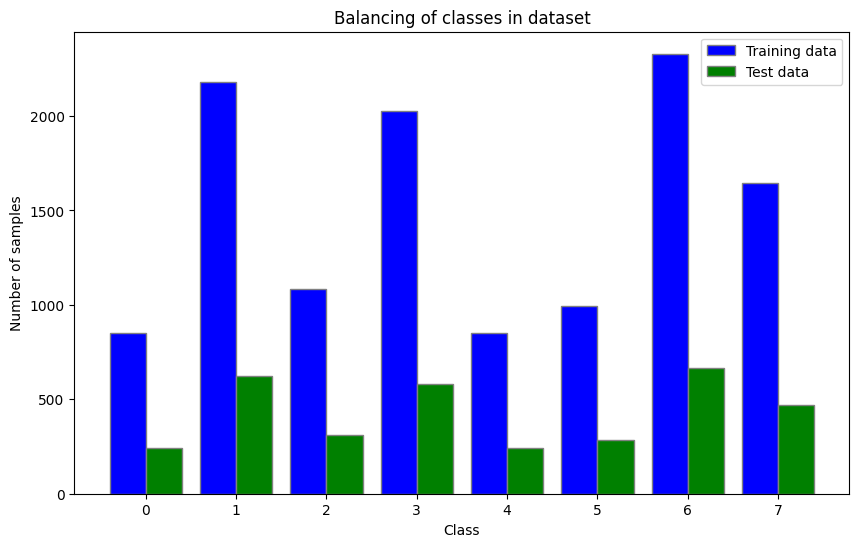

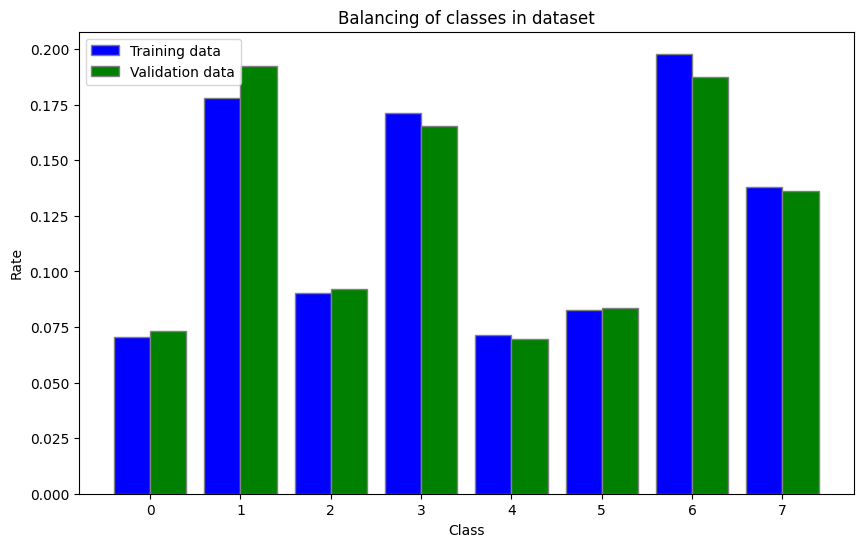

In [36]:
# Dataset balancing

train_one_hot = to_categorical(y_train_full)
test_one_hot =  to_categorical(y_test)
                                 
train_balancing = np.sum(train_one_hot, axis=0)
test_balancing = np.sum(test_one_hot, axis=0)
test_balancing_norm = test_balancing/np.sum(test_balancing, axis=0)

barWidth = 0.4

plt.figure(figsize=(10,6))
 
# Set position of bar on X axis 
br1 = np.arange(len(train_balancing)) 
br2 = [x + barWidth for x in br1] 
 
# Make the plot
plt.bar(br1, train_balancing, color ='b', width = barWidth, 
        edgecolor ='grey', label ='Training data') 
plt.bar(br2, test_balancing, color ='g', width = barWidth, 
        edgecolor ='grey', label ='Test data') 
 
# Adding Xticks 
plt.xlabel('Class') 
plt.ylabel('Number of samples') 
plt.xticks([r + barWidth/2 for r in range(len(train_balancing))], 
        ['0', '1', '2', '3', '4', '5', '6', '7'])
plt.title('Balancing of classes in dataset')
 
plt.legend(loc='upper right')

plt.savefig("../plot/Balancing_of_classes.pdf", format="pdf", bbox_inches="tight")

# Using holdout

train_one_hot = to_categorical(y_train)
val_one_hot =  to_categorical(y_val)
                                 
train_balancing = np.sum(train_one_hot, axis=0)
val_balancing = np.sum(val_one_hot, axis=0)

train_balancing = train_balancing/np.sum(train_balancing)
val_balancing = val_balancing/np.sum(val_balancing)

barWidth = 0.4

plt.figure(figsize=(10,6))
 
# Set position of bar on X axis 
br1 = np.arange(len(train_balancing)) 
br2 = [x + barWidth for x in br1] 
 
# Make the plot
plt.bar(br1, train_balancing, color ='b', width = barWidth, 
        edgecolor ='grey', label ='Training data') 
plt.bar(br2, val_balancing, color ='g', width = barWidth, 
        edgecolor ='grey', label ='Validation data') 
 
# Adding Xticks 
plt.xlabel('Class') 
plt.ylabel('Rate') 
plt.xticks([r + barWidth/2 for r in range(len(train_balancing))], 
        ['0', '1', '2', '3', '4', '5', '6', '7'])
plt.title('Balancing of classes in dataset')
 
plt.legend(loc='upper left')

plt.savefig("../plot/Balancing_of_classes_holdout.pdf", format="pdf", bbox_inches="tight")

---
### Busca pela melhor rede

Busca em grid variando alguns valores como:

- Quantidade de neuronios (512, 1024, 2048, 4096, 8192)
- Função de ativação (sigmoid, ReLU)
- Dropout (0, 0,25, 0,5)
- Otimizador (adam, sgd)

Treinar muitas épocas com a callback de salvar a melhor época

---

In [31]:
def build_and_test_mlp(n_neurons=64, activation_fnc="relu", dropout=0.0, optimizer="sgd", epochs=300):
    
    tf.keras.backend.clear_session() # Free memory and clear old models in session
    
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=[INPUT_N,INPUT_N,3]))
    model.add(tf.keras.layers.Dense(n_neurons,activation=activation_fnc))
    model.add(tf.keras.layers.Dropout(rate=dropout))
    model.add(tf.keras.layers.Dense(8, activation="softmax"))
    
    model.summary()
    
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer=optimizer,
                  metrics=["accuracy"])
    
    checkpoint_cb = keras.callbacks.ModelCheckpoint("../model/mlp/mlp_"+str(n_neurons)+"_"+(activation_fnc)+"_"+str(dropout)+"_"+(optimizer)+".weights.h5",
                                                    save_best_only=True, save_weights_only=True)
    
    history = model.fit(X_train, y_train, epochs=epochs,
                        validation_data=(X_val, y_val),
                        callbacks=[checkpoint_cb])
    
    model.load_weights("../model/mlp/mlp_"+str(n_neurons)+"_"+(activation_fnc)+"_"+str(dropout)+"_"+(optimizer)+".weights.h5")
    
    val_accuracy = max(history.history['val_accuracy'])
    
    val_loss = history.history['val_loss'][history.history['val_accuracy'].index(val_accuracy)]
    
    model_specs = dict(n_neurons=n_neurons,
                       activation_fnc=activation_fnc,
                       dropout=dropout,
                       optimizer=optimizer,
                       loss=val_loss,
                       accuracy=val_accuracy)
    
    return model_specs, history, model

def restoreModel(n_neurons=64, activation_fnc="relu", dropout=0.0, optimizer="sgd"):
    tf.keras.backend.clear_session() # Free memory and clear old models in session
    
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=[INPUT_N,INPUT_N,3]))
    model.add(tf.keras.layers.Dense(n_neurons,activation=activation_fnc))
    model.add(tf.keras.layers.Dropout(rate=dropout))
    model.add(tf.keras.layers.Dense(8, activation="softmax"))
    
    model.summary()    
    
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer=optimizer,
                  metrics=["accuracy"])
    
    model.load_weights("../model/mlp/mlp_"+str(n_neurons)+"_"+(activation_fnc)+"_"+str(dropout)+"_"+(optimizer)+".weights.h5")
    
    return model
    

/home/toffanetto/.local/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 2352)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       150,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 151,112 (590.28 KB)

 Trainable params: 151,112 (590.28 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3044 - loss: 1.8391 - val_accuracy: 0.4247 - val_loss: 1.4265
Epoch 2/10
262/262 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5013 - loss: 1.3406 - val_accuracy: 0.6201 - val_loss: 1.1754
Epoch 3/10
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5838 - loss: 1.1537 - val_accuracy: 0.6591 - val_loss: 1.0130
Epoch 4/10
262/262 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6219 - loss: 1.0452 - val_accuracy: 0.5410 - val_loss: 1.1148
Epoch 5/10
262/262 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6486 - loss: 0.9730 - val_accuracy: 0.6803 - val_loss: 0.9185
Epoch 6/10
262/262 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6533 - loss: 0.9756 - val_accuracy: 0.6909 - val_loss: 0.8735
Epoch 7/10
262/262 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6838 - loss: 0.8817 - val_accuracy: 0.6887 - val_loss: 0.8904
Epoch 8/10
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6925 - loss: 0.8608 - val_accuracy: 0.

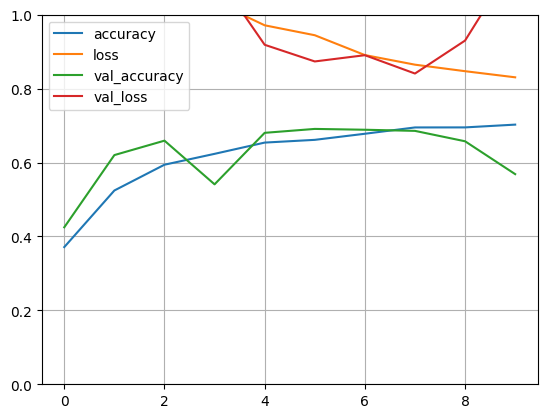

In [27]:
# Test custom model

model_specs, history, _ = build_and_test_mlp(epochs=10)

pd.DataFrame(history.history).plot()
plt.grid(True)
plt.ylim([0,1])

print(model_specs)


In [4]:
epochs = 500

n_neurons_search = [256, 512, 1024, 2048, 4096]

activation_fnc_search = ["relu", "sigmoid"]

dropout_search = [0.0, 0.25, 0.5]

optimizer_search = ["adam", "sgd"]


In [29]:
############################################
# Number of neurons search

n_neurons_models = []
n_neurons_historys = []

for n_neurons in n_neurons_search:
    print("|++| Training for "+str(n_neurons)+" neurons |++|\n")
    model_specs, history, _ = build_and_test_mlp(n_neurons=n_neurons,epochs=epochs)
    n_neurons_models.append(model_specs)
    n_neurons_historys.append(history)
    
best_model_neurons = dict(n_neurons=0,
                          activation_fnc="",        
                          dropout=0,
                          optimizer="",
                          loss=0,
                          accuracy=0)

for model in n_neurons_models:
    if model["accuracy"] > best_model_neurons["accuracy"]:
        best_model_neurons = model
    
best_n_neurons = best_model_neurons["n_neurons"]

print(n_neurons_models)
print(best_n_neurons)


|++| Training for 256 neurons |++|



/home/toffanetto/.local/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 2352)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       602,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │         2,056 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 604,424 (2.31 MB)

 Trainable params: 604,424 (2.31 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
262/262 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3290 - loss: 1.7694 - val_accuracy: 0.3317 - val_loss: 1.4959
Epoch 2/500
262/262 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5422 - loss: 1.2264 - val_accuracy: 0.5582 - val_loss: 1.1743
Epoch 3/500
262/262 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5898 - loss: 1.1054 - val_accuracy: 0.5975 - val_loss: 1.0522
Epoch 4/500
262/262 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6413 - loss: 0.9811 - val_accuracy: 0.6906 - val_loss: 0.8973
Epoch 5/500
262/262 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6436 - loss: 0.9794 - val_accuracy: 0.5936 - val_loss: 0.9718
Epoch 6/500
262/262 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6584 - loss: 0.9258 - val_accuracy: 0.6371 - val_loss: 0.9382
Epoch 7/500
262/262 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6770 - loss: 0.8879 - val_accuracy: 0.7244 - val_loss: 0.7872
Epoch 8/500
262/262 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6949 - loss: 0.8547 - val_accu

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 2352)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,204,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │         4,104 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,208,840 (4.61 MB)

 Trainable params: 1,208,840 (4.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
262/262 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3395 - loss: 1.8033 - val_accuracy: 0.5594 - val_loss: 1.2499
Epoch 2/500
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5383 - loss: 1.2197 - val_accuracy: 0.6229 - val_loss: 1.0673
Epoch 3/500
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5996 - loss: 1.0708 - val_accuracy: 0.5382 - val_loss: 1.0355
Epoch 4/500
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6333 - loss: 1.0004 - val_accuracy: 0.5652 - val_loss: 1.1241
Epoch 5/500
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6400 - loss: 0.9849 - val_accuracy: 0.6792 - val_loss: 0.8738
Epoch 6/500
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6776 - loss: 0.9029 - val_accuracy: 0.6892 - val_loss: 0.8612
Epoch 7/500
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6878 - loss: 0.8697 - val_accuracy: 0.6943 - val_loss: 0.8431
Epoch 8/500
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7051 - loss: 0.8496 - val_accu

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 2352)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     2,409,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │         8,200 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,417,672 (9.22 MB)

 Trainable params: 2,417,672 (9.22 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
262/262 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3272 - loss: 1.8636 - val_accuracy: 0.6221 - val_loss: 1.1787
Epoch 2/500
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5631 - loss: 1.1836 - val_accuracy: 0.4900 - val_loss: 1.1939
Epoch 3/500
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6090 - loss: 1.0507 - val_accuracy: 0.6366 - val_loss: 1.0199
Epoch 4/500
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6457 - loss: 0.9890 - val_accuracy: 0.5973 - val_loss: 1.0439
Epoch 5/500
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6632 - loss: 0.9233 - val_accuracy: 0.5493 - val_loss: 1.2403
Epoch 6/500
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6730 - loss: 0.9264 - val_accuracy: 0.6901 - val_loss: 0.8625
Epoch 7/500
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6951 - loss: 0.8630 - val_accuracy: 0.7188 - val_loss: 0.8347
Epoch 8/500
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7050 - loss: 0.8342 - val_accu

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 2352)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2048)           │     4,818,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │        16,392 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,835,336 (18.45 MB)

 Trainable params: 4,835,336 (18.45 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
262/262 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.3317 - loss: 1.9436 - val_accuracy: 0.4810 - val_loss: 1.2818
Epoch 2/500
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5674 - loss: 1.1698 - val_accuracy: 0.5825 - val_loss: 1.0635
Epoch 3/500
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6260 - loss: 1.0375 - val_accuracy: 0.6237 - val_loss: 1.0255
Epoch 4/500
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6540 - loss: 0.9707 - val_accuracy: 0.7263 - val_loss: 0.8542
Epoch 5/500
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6645 - loss: 0.9108 - val_accuracy: 0.6561 - val_loss: 0.8987
Epoch 6/500
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6993 - loss: 0.8645 - val_accuracy: 0.7238 - val_loss: 0.7969
Epoch 7/500
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7011 - loss: 0.8498 - val_accuracy: 0.6918 - val_loss: 0.8568
Epoch 8/500
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7086 - loss: 0.8270 - val_accu

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 2352)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │     9,637,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │        32,776 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,670,664 (36.89 MB)

 Trainable params: 9,670,664 (36.89 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
262/262 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.3335 - loss: 2.0133 - val_accuracy: 0.5605 - val_loss: 1.2501
Epoch 2/500
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5812 - loss: 1.1402 - val_accuracy: 0.5792 - val_loss: 1.0778
Epoch 3/500
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6107 - loss: 1.0404 - val_accuracy: 0.6619 - val_loss: 0.9370
Epoch 4/500
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6691 - loss: 0.9435 - val_accuracy: 0.6516 - val_loss: 0.9251
Epoch 5/500
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6867 - loss: 0.8978 - val_accuracy: 0.7146 - val_loss: 0.8127
Epoch 6/500
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7005 - loss: 0.8511 - val_accuracy: 0.7040 - val_loss: 0.8332
Epoch 7/500
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7056 - loss: 0.8520 - val_accuracy: 0.5895 - val_loss: 0.9787
Epoch 8/500
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7134 - loss: 0.8099 - val_accu

In [30]:
############################################
# Activation function search

activation_fnc_models = []
activation_fnc_historys = []

for activation_fnc in activation_fnc_search:
    print("|++| Training for "+activation_fnc+" activation function |++|\n")
    model_specs, history, _ = build_and_test_mlp(n_neurons=best_n_neurons,activation_fnc=activation_fnc,
                                              epochs=epochs)
    activation_fnc_models.append(model_specs)
    activation_fnc_historys.append(history)
    
best_model_activation_fnc = dict(n_neurons=0,
                                 activation_fnc="",    
                                 dropout=0,             
                                 optimizer="",          
                                 loss=0,                 
                                 accuracy=0)

for model in activation_fnc_models:
    if model["accuracy"] > best_model_activation_fnc["accuracy"]:
        best_model_activation_fnc = model

best_activation_fnc = best_model_activation_fnc["activation_fnc"]

print(activation_fnc_models)
print(best_activation_fnc)
    


|++| Training for relu activation function |++|



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 2352)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │     9,637,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │        32,776 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,670,664 (36.89 MB)

 Trainable params: 9,670,664 (36.89 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
262/262 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3516 - loss: 1.9727 - val_accuracy: 0.3749 - val_loss: 1.4868
Epoch 2/500
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5871 - loss: 1.1338 - val_accuracy: 0.5321 - val_loss: 1.1287
Epoch 3/500
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6349 - loss: 1.0107 - val_accuracy: 0.6550 - val_loss: 0.9461
Epoch 4/500
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6553 - loss: 0.9619 - val_accuracy: 0.6636 - val_loss: 0.9560
Epoch 5/500
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6680 - loss: 0.9175 - val_accuracy: 0.6366 - val_loss: 0.9246
Epoch 6/500
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6937 - loss: 0.8588 - val_accuracy: 0.6700 - val_loss: 0.8766
Epoch 7/500
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7062 - loss: 0.8339 - val_accuracy: 0.7026 - val_loss: 0.8080
Epoch 8/500
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7161 - loss: 0.7975 - val_accu

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 2352)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │     9,637,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │        32,776 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,670,664 (36.89 MB)

 Trainable params: 9,670,664 (36.89 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
262/262 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.2081 - loss: 2.2540 - val_accuracy: 0.4214 - val_loss: 1.7312
Epoch 2/500
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3597 - loss: 1.7492 - val_accuracy: 0.3384 - val_loss: 1.4953
Epoch 3/500
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4142 - loss: 1.5094 - val_accuracy: 0.4451 - val_loss: 1.3747
Epoch 4/500
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4744 - loss: 1.3641 - val_accuracy: 0.4011 - val_loss: 1.5789
Epoch 5/500
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5222 - loss: 1.2589 - val_accuracy: 0.6129 - val_loss: 1.1506
Epoch 6/500
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5685 - loss: 1.1953 - val_accuracy: 0.4108 - val_loss: 1.4709
Epoch 7/500
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5917 - loss: 1.1314 - val_accuracy: 0.6502 - val_loss: 1.0338
Epoch 8/500
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6168 - loss: 1.0696 - val_accu

In [31]:
############################################
# Dropout search

dropout_models = []
dropout_historys = []

for dropout in dropout_search:
    print("|++| Training for "+str(dropout)+" dropout rate |++|\n")
    model_specs, history, _ = build_and_test_mlp(n_neurons=best_n_neurons,activation_fnc=best_activation_fnc, 
                                              dropout=dropout, epochs=epochs)
    dropout_models.append(model_specs)
    dropout_historys.append(history)
    
best_model_dropout = dict(n_neurons=0,           
                          activation_fnc="",                
                          dropout=0,                       
                          optimizer="",            
                          loss=0,    
                          accuracy=0)

for model in dropout_models:
    if model["accuracy"] > best_model_dropout["accuracy"]:
        best_model_dropout = model

best_dropout = best_model_dropout["dropout"]

print(dropout_models)
print(best_dropout)

|++| Training for 0.0 dropout rate |++|



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 2352)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │     9,637,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │        32,776 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,670,664 (36.89 MB)

 Trainable params: 9,670,664 (36.89 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
262/262 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3533 - loss: 2.0121 - val_accuracy: 0.5312 - val_loss: 1.2079
Epoch 2/500
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5807 - loss: 1.1554 - val_accuracy: 0.5967 - val_loss: 1.0418
Epoch 3/500
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6147 - loss: 1.0287 - val_accuracy: 0.4822 - val_loss: 1.3342
Epoch 4/500
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6618 - loss: 0.9506 - val_accuracy: 0.6315 - val_loss: 0.9778
Epoch 5/500
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6750 - loss: 0.9124 - val_accuracy: 0.6212 - val_loss: 0.9628
Epoch 6/500
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6759 - loss: 0.8820 - val_accuracy: 0.7244 - val_loss: 0.8012
Epoch 7/500
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6938 - loss: 0.8717 - val_accuracy: 0.6198 - val_loss: 1.0330
Epoch 8/500
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7208 - loss: 0.8133 - val_accu

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 2352)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │     9,637,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │        32,776 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,670,664 (36.89 MB)

 Trainable params: 9,670,664 (36.89 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
262/262 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.3406 - loss: 2.0917 - val_accuracy: 0.5959 - val_loss: 1.1723
Epoch 2/500
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5747 - loss: 1.1498 - val_accuracy: 0.5602 - val_loss: 1.1168
Epoch 3/500
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6156 - loss: 1.0532 - val_accuracy: 0.6756 - val_loss: 0.9416
Epoch 4/500
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6556 - loss: 0.9671 - val_accuracy: 0.5727 - val_loss: 1.1278
Epoch 5/500
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6657 - loss: 0.9175 - val_accuracy: 0.6809 - val_loss: 0.8445
Epoch 6/500
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6866 - loss: 0.8866 - val_accuracy: 0.6842 - val_loss: 0.8440
Epoch 7/500
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6771 - loss: 0.8746 - val_accuracy: 0.6109 - val_loss: 0.9421
Epoch 8/500
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6997 - loss: 0.8512 - val_acc

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 2352)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │     9,637,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │        32,776 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,670,664 (36.89 MB)

 Trainable params: 9,670,664 (36.89 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
262/262 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.3298 - loss: 2.0772 - val_accuracy: 0.5477 - val_loss: 1.2371
Epoch 2/500
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5469 - loss: 1.2072 - val_accuracy: 0.5624 - val_loss: 1.1519
Epoch 3/500
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5897 - loss: 1.0963 - val_accuracy: 0.6714 - val_loss: 0.9345
Epoch 4/500
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6208 - loss: 1.0084 - val_accuracy: 0.6622 - val_loss: 0.9422
Epoch 5/500
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6479 - loss: 0.9751 - val_accuracy: 0.6198 - val_loss: 1.0421
Epoch 6/500
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6609 - loss: 0.9381 - val_accuracy: 0.6904 - val_loss: 0.8425
Epoch 7/500
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6783 - loss: 0.9238 - val_accuracy: 0.7085 - val_loss: 0.8276
Epoch 8/500
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6869 - loss: 0.8672 - val_acc

In [32]:

############################################
# Optimizer search

optimizer_models = []
optimizer_historys = []

for optimizer in optimizer_search:
    print("|++| Training for "+optimizer+" optimizer |++|\n")
    model_specs, history, _ = build_and_test_mlp(n_neurons=best_n_neurons,activation_fnc=best_activation_fnc, 
                                              dropout=best_dropout, optimizer=optimizer, epochs=epochs)
    optimizer_models.append(model_specs)
    optimizer_historys.append(history)
    
best_model_optimizer = dict(n_neurons=0,           
                            activation_fnc="",                
                            dropout=0,                       
                            optimizer="",            
                            loss=0,    
                            accuracy=0)

for model in optimizer_models:
    if model["accuracy"] > best_model_optimizer["accuracy"]:
        best_model_optimizer = model

best_optimizer = best_model_optimizer["optimizer"]

print(optimizer_models)
print(best_optimizer)

|++| Training for adam optimizer |++|



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 2352)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │     9,637,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │        32,776 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,670,664 (36.89 MB)

 Trainable params: 9,670,664 (36.89 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
262/262 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.3442 - loss: 4.3773 - val_accuracy: 0.5633 - val_loss: 1.0619
Epoch 2/500
262/262 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5924 - loss: 1.0851 - val_accuracy: 0.6934 - val_loss: 0.8701
Epoch 3/500
262/262 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6345 - loss: 0.9895 - val_accuracy: 0.6831 - val_loss: 0.8764
Epoch 4/500
262/262 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6473 - loss: 0.9565 - val_accuracy: 0.6862 - val_loss: 0.8146
Epoch 5/500
262/262 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6912 - loss: 0.8667 - val_accuracy: 0.6787 - val_loss: 0.8657
Epoch 6/500
262/262 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6869 - loss: 0.8361 - val_accuracy: 0.6692 - val_loss: 0.8397
Epoch 7/500
262/262 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6956 - loss: 0.8216 - val_accuracy: 0.7625 - val_loss: 0.6934
Epoch 8/500
262/262 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7209 - loss: 0.7835 - val_acc

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 2352)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │     9,637,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │        32,776 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,670,664 (36.89 MB)

 Trainable params: 9,670,664 (36.89 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
262/262 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.3416 - loss: 1.9659 - val_accuracy: 0.5371 - val_loss: 1.2093
Epoch 2/500
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5774 - loss: 1.1706 - val_accuracy: 0.4601 - val_loss: 1.2499
Epoch 3/500
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6230 - loss: 1.0390 - val_accuracy: 0.5872 - val_loss: 0.9975
Epoch 4/500
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6291 - loss: 1.0072 - val_accuracy: 0.6901 - val_loss: 0.8965
Epoch 5/500
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6659 - loss: 0.9285 - val_accuracy: 0.6388 - val_loss: 0.9345
Epoch 6/500
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6840 - loss: 0.8843 - val_accuracy: 0.7436 - val_loss: 0.7725
Epoch 7/500
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6934 - loss: 0.8600 - val_accuracy: 0.6669 - val_loss: 0.8905
Epoch 8/500
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7080 - loss: 0.8279 - val_acc

In [33]:
print(best_model_neurons["accuracy"])
print(best_model_activation_fnc["accuracy"])
print(best_model_dropout["accuracy"])
print(best_model_optimizer["accuracy"])

best_model = dict(n_neurons=best_n_neurons,
                  activation_fnc=best_activation_fnc,
                  dropout=best_dropout,
                  optimizer=best_optimizer)

print("\nBest model founded: "+str(best_model))
    


0.8832218647003174
0.8832218647003174
0.8846153616905212
0.8846153616905212

Best model founded: {'n_neurons': 4096, 'activation_fnc': 'relu', 'dropout': 0.25, 'optimizer': 'sgd'}


---
Uma vez definido o melhor modelo, obter dele:
- Acurácia (balanceada) 
- Matriz de confusão
- Comparar amostras que erraram 
  - O quanto errou, com qual classe confundiu
  - Comparação visual

---

In [34]:
model_specs, history, model = build_and_test_mlp(n_neurons=best_model["n_neurons"],activation_fnc=best_model["activation_fnc"],
                                          dropout=best_model["dropout"],optimizer=best_model["optimizer"], epochs=epochs)

print(model_specs)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 2352)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │     9,637,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │        32,776 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,670,664 (36.89 MB)

 Trainable params: 9,670,664 (36.89 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
262/262 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.3299 - loss: 2.0524 - val_accuracy: 0.4980 - val_loss: 1.3220
Epoch 2/500
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5616 - loss: 1.1723 - val_accuracy: 0.6419 - val_loss: 1.0381
Epoch 3/500
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6069 - loss: 1.0596 - val_accuracy: 0.6380 - val_loss: 0.9943
Epoch 4/500
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6587 - loss: 0.9588 - val_accuracy: 0.7076 - val_loss: 0.8534
Epoch 5/500
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6662 - loss: 0.9328 - val_accuracy: 0.6876 - val_loss: 0.8768
Epoch 6/500
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6878 - loss: 0.8808 - val_accuracy: 0.6890 - val_loss: 0.8561
Epoch 7/500
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6981 - loss: 0.8380 - val_accuracy: 0.7207 - val_loss: 0.7894
Epoch 8/500
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7156 - loss: 0.8116 - val_acc

---
### Loss and accuracy through training
---

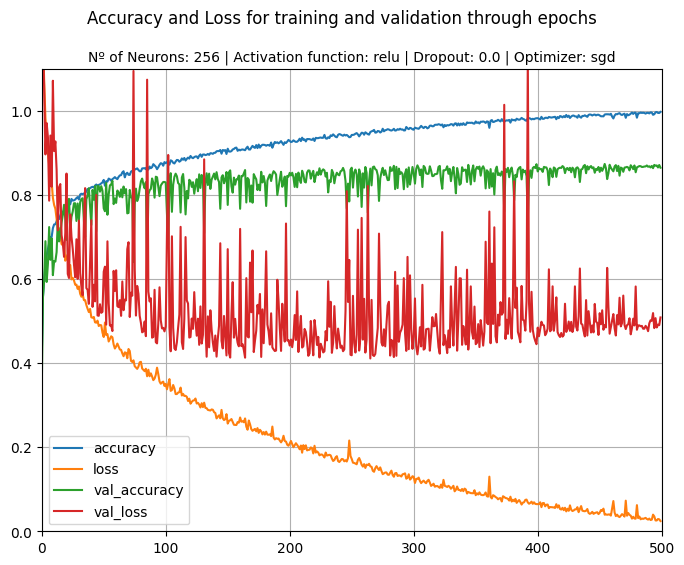

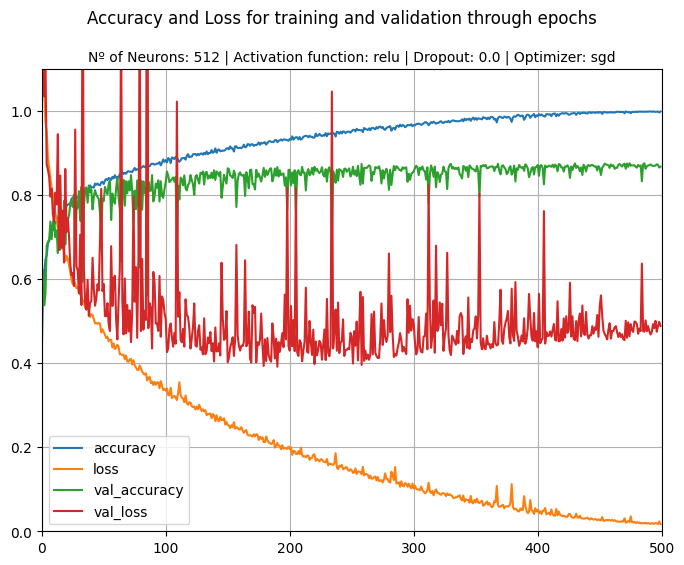

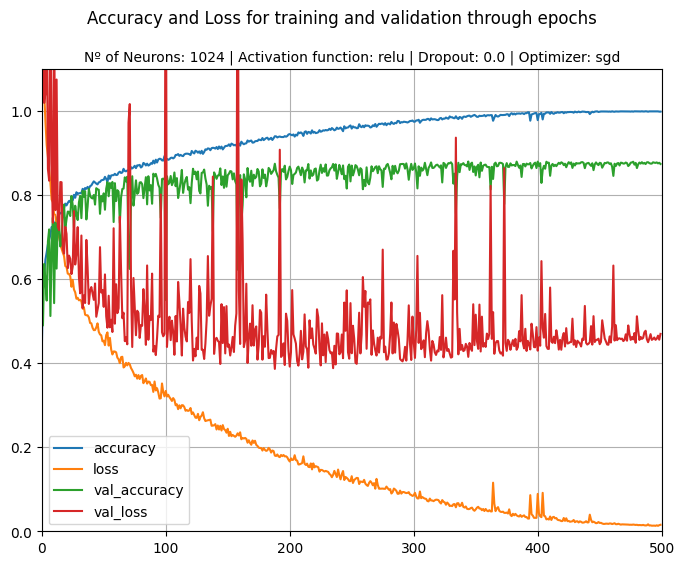

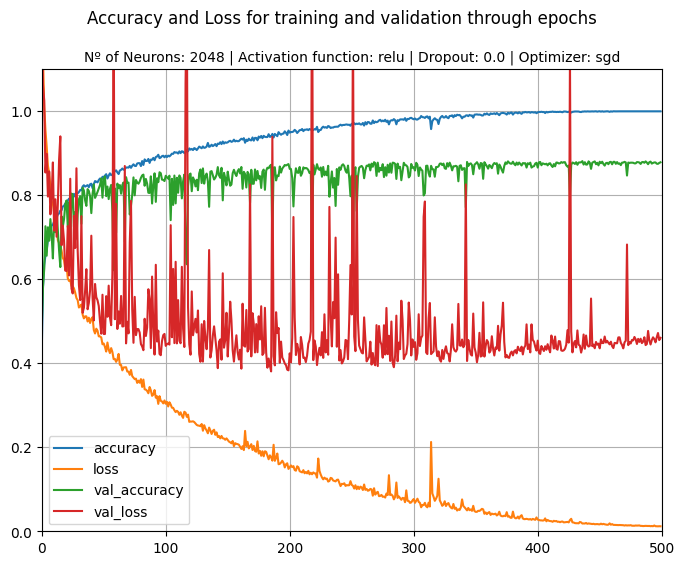

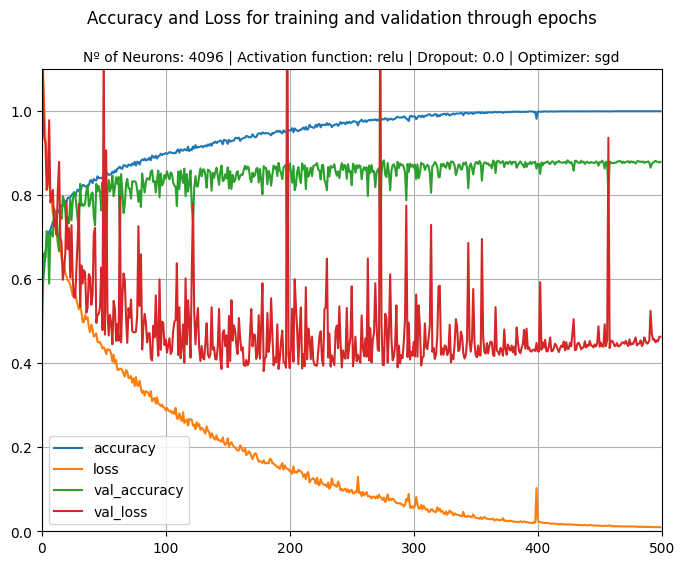

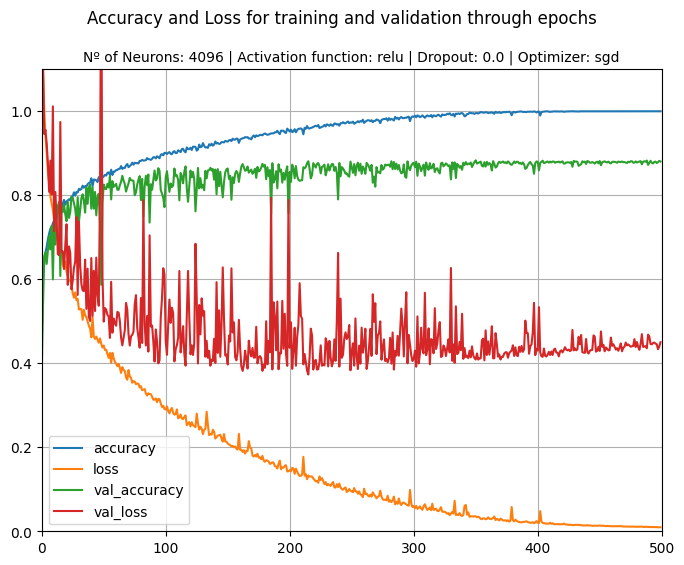

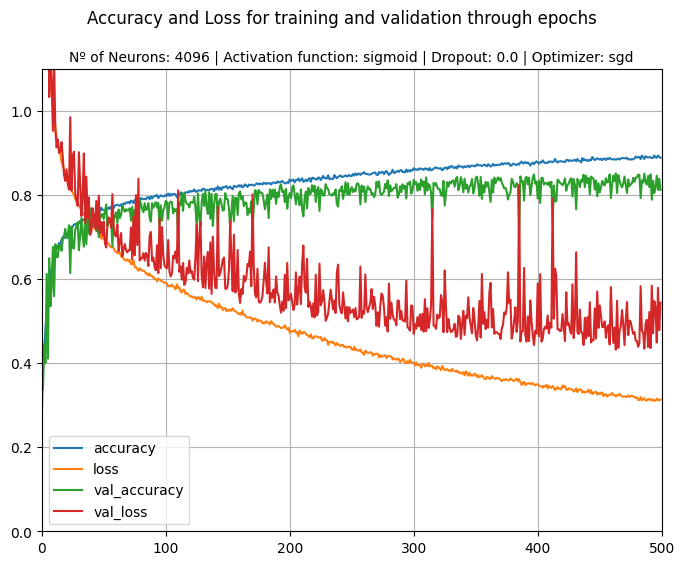

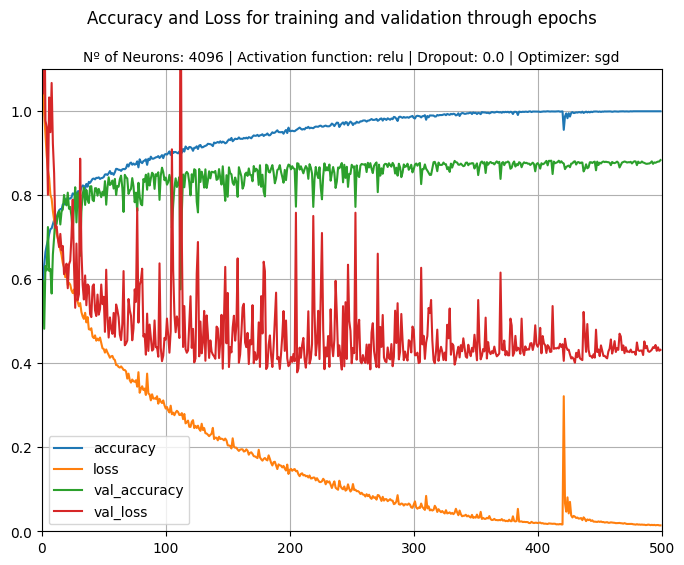

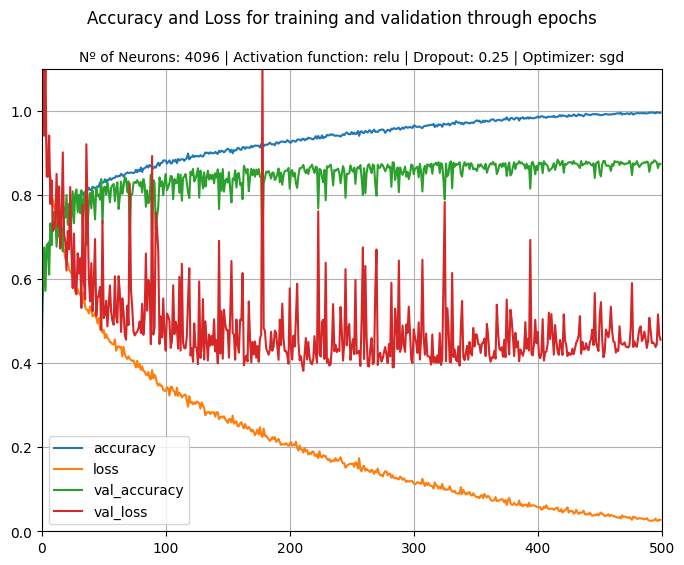

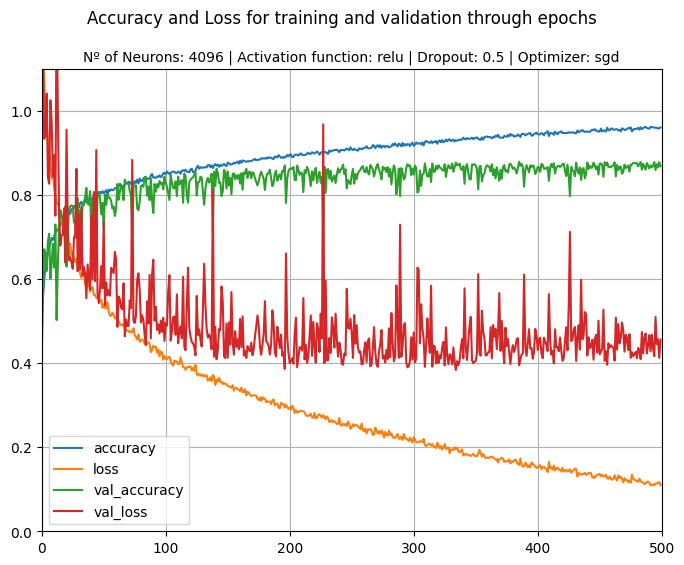

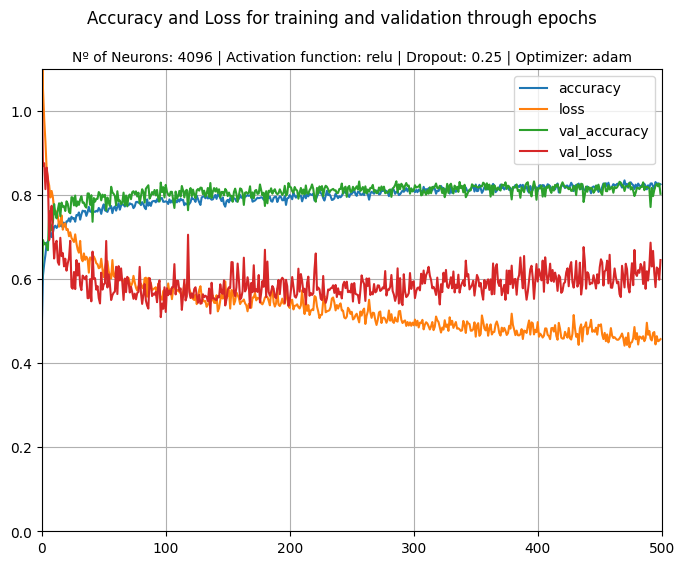

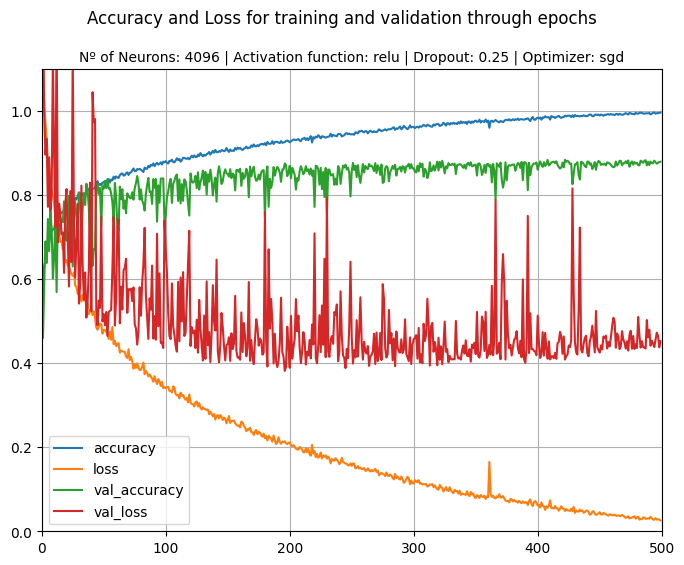

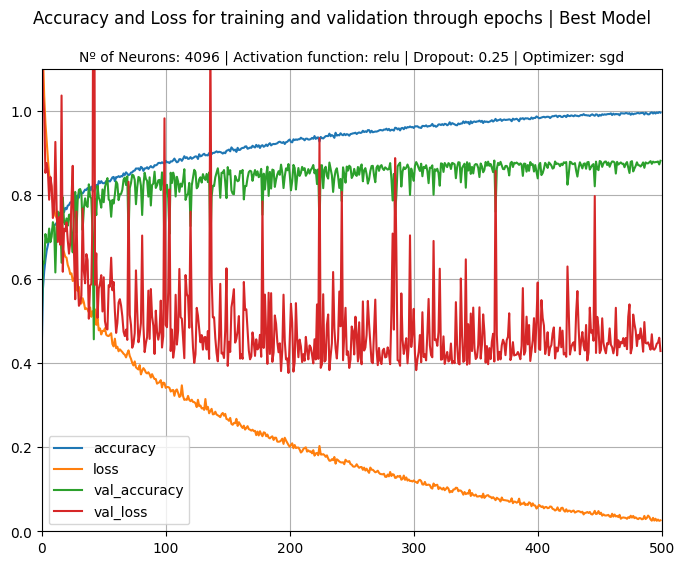

In [35]:
# Plot all loss & validation graphs
def plotLossAccuracy2Epochs(historyV, modelV, title_append=""):
    
    for model, history in zip(modelV, historyV):
        pd.DataFrame(history.history).plot(figsize=(8,6))
        plt.grid(True)
        plt.ylim([0,1.1])
        plt.xlim([0,epochs])
        plt.suptitle("Accuracy and Loss for training and validation through epochs"+title_append, fontsize=12)
        plt.title('Nº of Neurons: '+str(model["n_neurons"])+
                ' | Activation function: '+str(model["activation_fnc"])+
                ' | Dropout: '+str(model["dropout"])+
                ' | Optimizer: '+str(model["optimizer"]),fontsize=10)
        
        plt.savefig("../plot/mlp/mlp_"+str(model["n_neurons"])+"_"+
                    (model["activation_fnc"])+"_"+str(model["dropout"])+"_"+
                    (model["optimizer"])+title_append+".pdf",
                    format="pdf", bbox_inches="tight")
    
plotLossAccuracy2Epochs(n_neurons_historys, n_neurons_models)
plotLossAccuracy2Epochs(activation_fnc_historys, activation_fnc_models)
plotLossAccuracy2Epochs(dropout_historys, dropout_models)
plotLossAccuracy2Epochs(optimizer_historys, optimizer_models)
plotLossAccuracy2Epochs([history], [model_specs],title_append=" | Best Model")

Sobre a busca:

- Boxplot ou gráfico de linhas do comportamento da acurácia com a variação dos hiper parâmetros

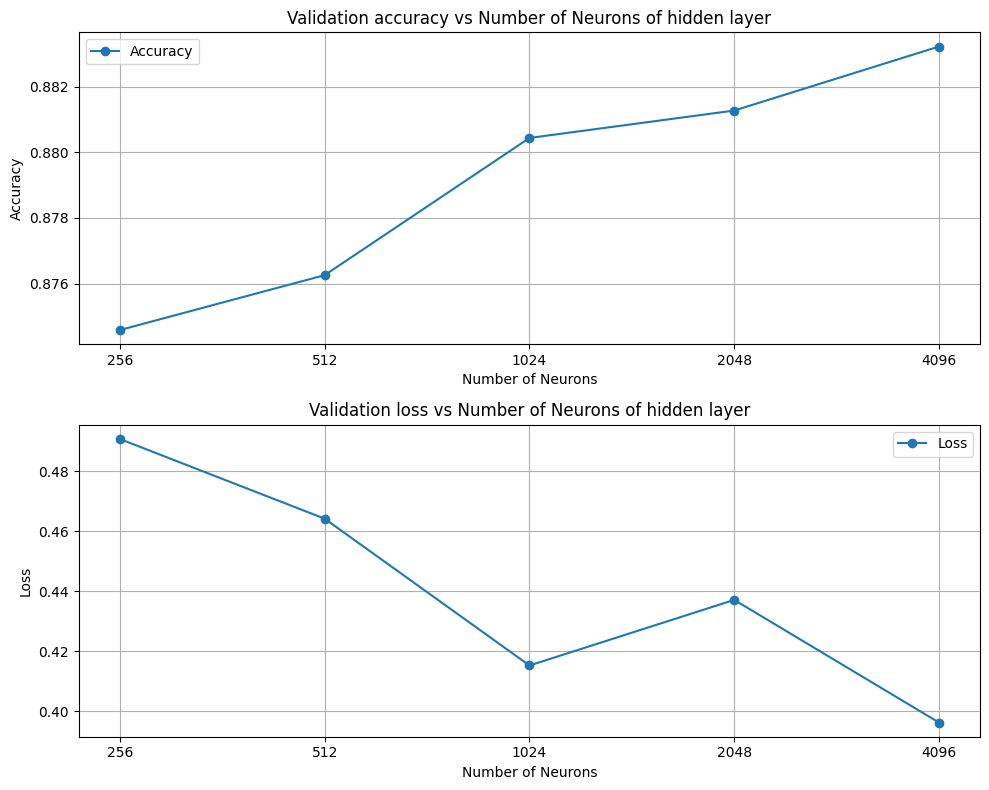

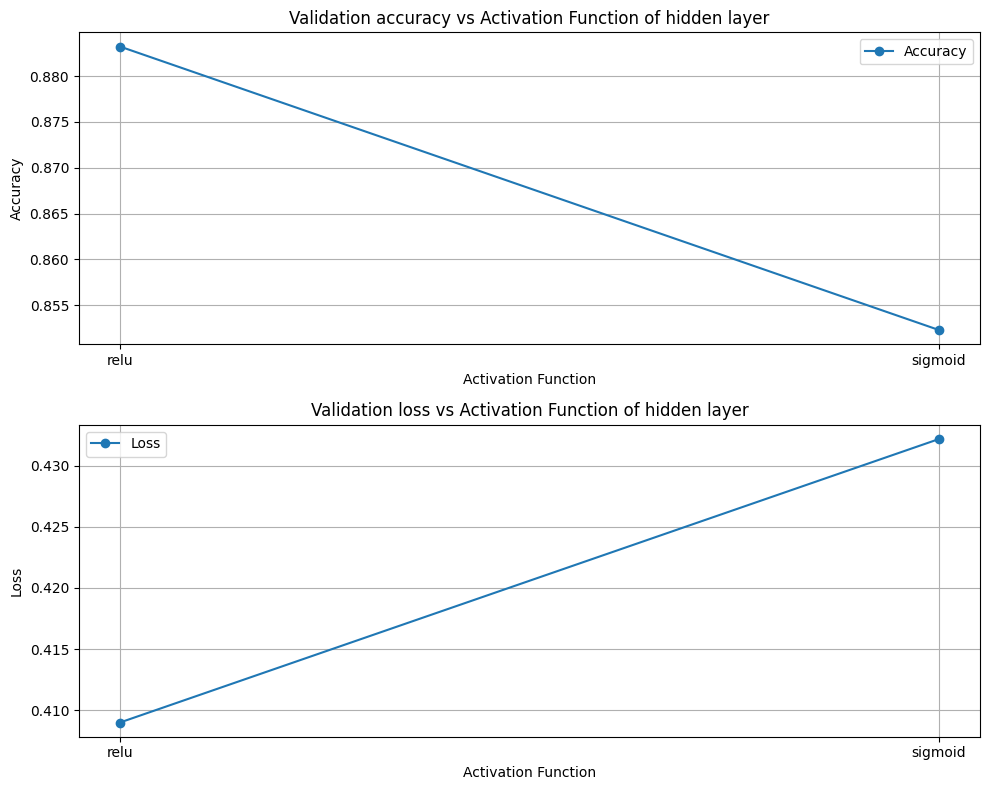

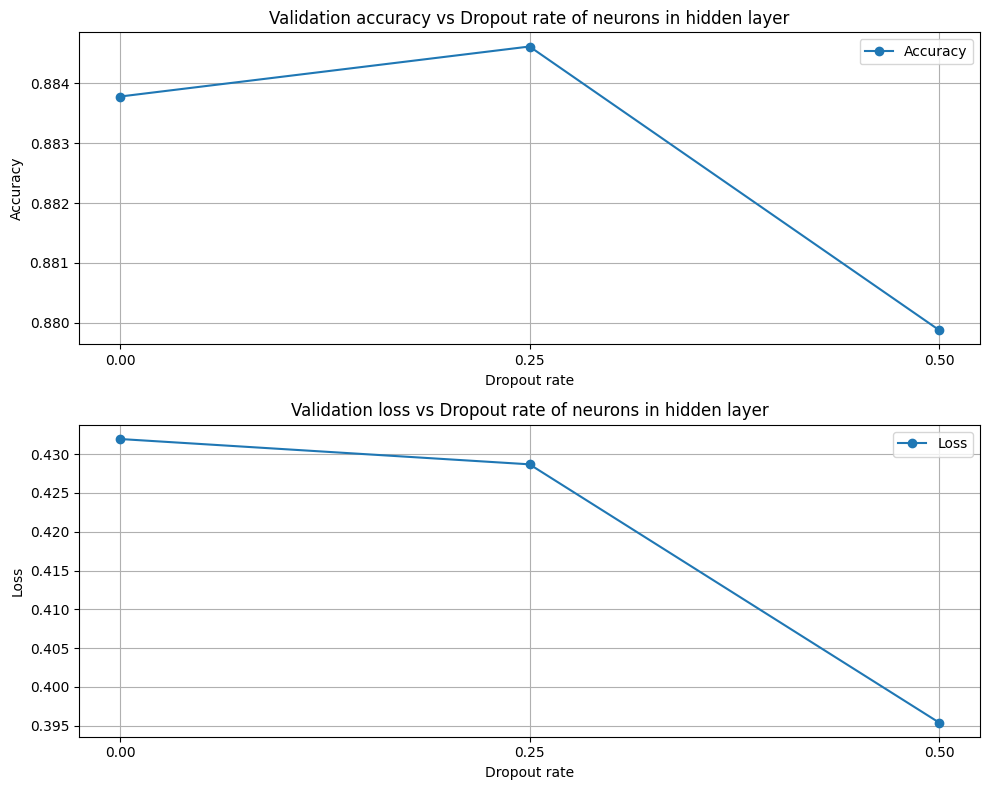

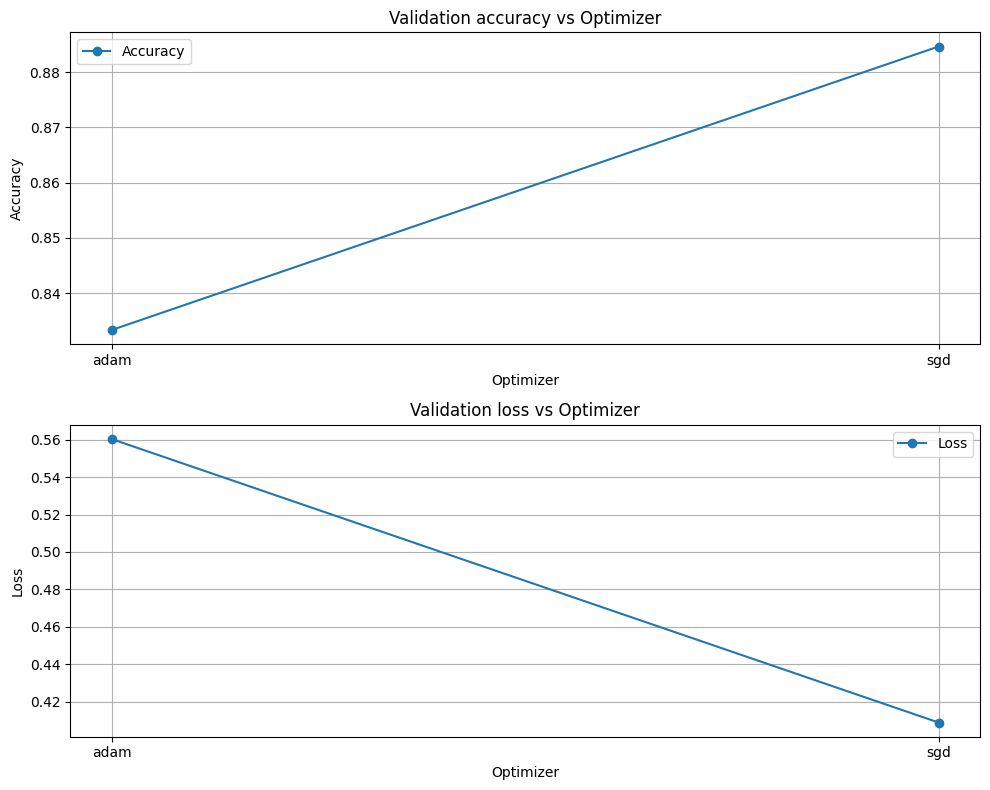

In [7]:
search_neurons_dict = [{'n_neurons': 256, 'activation_fnc': 'relu', 'dropout': 0.0, 'optimizer': 'sgd', 'loss': 0.4907476305961609, 'accuracy': 0.8745819330215454}, {'n_neurons': 512, 'activation_fnc': 'relu', 'dropout': 0.0, 'optimizer': 'sgd', 'loss': 0.4642014801502228, 'accuracy': 0.8762542009353638}, {'n_neurons': 1024, 'activation_fnc': 'relu', 'dropout': 0.0, 'optimizer': 'sgd', 'loss': 0.41529539227485657, 'accuracy': 0.8804348111152649}, {'n_neurons': 2048, 'activation_fnc': 'relu', 'dropout': 0.0, 'optimizer': 'sgd', 'loss': 0.437145859003067, 'accuracy': 0.8812708854675293}, {'n_neurons': 4096, 'activation_fnc': 'relu', 'dropout': 0.0, 'optimizer': 'sgd', 'loss': 0.396284282207489, 'accuracy': 0.8832218647003174}]

search_neurons_accuracy = []
search_neurons_loss = []

for test in search_neurons_dict:
    search_neurons_accuracy.append(test["accuracy"])
    search_neurons_loss.append(test["loss"])
    
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
plt.plot([1, 2, 3, 4, 5],search_neurons_accuracy,'o-',label="Accuracy")
plt.xticks([1, 2, 3, 4, 5], n_neurons_search)
plt.xlabel("Number of Neurons")
plt.ylabel("Accuracy")
plt.title("Validation accuracy vs Number of Neurons of hidden layer")
plt.legend()
plt.grid()
plt.subplot(2,1,2)
plt.plot([1, 2, 3, 4, 5],search_neurons_loss,'o-',label="Loss")
plt.xticks([1, 2, 3, 4, 5],n_neurons_search)
plt.xlabel("Number of Neurons")
plt.ylabel("Loss")
plt.title("Validation loss vs Number of Neurons of hidden layer")
plt.legend()
plt.grid()
plt.tight_layout()

plt.savefig("../plot/mlp/search_neurons.pdf", format="pdf", bbox_inches="tight")

search_activation_fnc_dict = [{'n_neurons': 4096, 'activation_fnc': 'relu', 'dropout': 0.0, 'optimizer': 'sgd', 'loss': 0.40898481011390686, 'accuracy': 0.8832218647003174}, {'n_neurons': 4096, 'activation_fnc': 'sigmoid', 'dropout': 0.0, 'optimizer': 'sgd', 'loss': 0.43217742443084717, 'accuracy': 0.8522853851318359}]

search_activation_fnc_accuracy = []
search_activation_fnc_loss = []

for test in search_activation_fnc_dict:
    search_activation_fnc_accuracy.append(test["accuracy"])
    search_activation_fnc_loss.append(test["loss"])
    
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
plt.plot([1, 2],search_activation_fnc_accuracy,'o-',label="Accuracy")
plt.xticks([1,2],activation_fnc_search)
plt.xlabel("Activation Function")
plt.ylabel("Accuracy")
plt.title("Validation accuracy vs Activation Function of hidden layer")
plt.legend()
plt.grid()
plt.subplot(2,1,2)
plt.plot([1, 2],search_activation_fnc_loss,'o-',label="Loss")
plt.xticks([1, 2],activation_fnc_search)
plt.xlabel("Activation Function")
plt.ylabel("Loss")
plt.title("Validation loss vs Activation Function of hidden layer")
plt.legend()
plt.grid()
plt.tight_layout()

plt.savefig("../plot/mlp/search_activation_fnc.pdf", format="pdf", bbox_inches="tight")
    
search_dropout_dict = [{'n_neurons': 4096, 'activation_fnc': 'relu', 'dropout': 0.0, 'optimizer': 'sgd', 'loss': 0.431958943605423, 'accuracy': 0.8837792873382568}, {'n_neurons': 4096, 'activation_fnc': 'relu', 'dropout': 0.25, 'optimizer': 'sgd', 'loss': 0.42869436740875244, 'accuracy': 0.8846153616905212}, {'n_neurons': 4096, 'activation_fnc': 'relu', 'dropout': 0.5, 'optimizer': 'sgd', 'loss': 0.39540112018585205, 'accuracy': 0.8798773884773254}]

search_dropout_accuracy = []
search_dropout_loss = []

for test in search_dropout_dict:
    search_dropout_accuracy.append(test["accuracy"])
    search_dropout_loss.append(test["loss"])
    
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
plt.plot(dropout_search,search_dropout_accuracy,'o-',label="Accuracy")
plt.xticks(dropout_search)
plt.xlabel("Dropout rate")
plt.ylabel("Accuracy")
plt.title("Validation accuracy vs Dropout rate of neurons in hidden layer")
plt.legend()
plt.grid()
plt.subplot(2,1,2)
plt.plot(dropout_search,search_dropout_loss,'o-',label="Loss")
plt.xticks(dropout_search)
plt.xlabel("Dropout rate")
plt.ylabel("Loss")
plt.title("Validation loss vs Dropout rate of neurons in hidden layer")
plt.legend()
plt.grid()
plt.tight_layout()

plt.savefig("../plot/mlp/search_dropout.pdf", format="pdf", bbox_inches="tight")
    
search_optimizer_dict = [{'n_neurons': 4096, 'activation_fnc': 'relu', 'dropout': 0.25, 'optimizer': 'adam', 'loss': 0.5603687763214111, 'accuracy': 0.8333333134651184}, {'n_neurons': 4096, 'activation_fnc': 'relu', 'dropout': 0.25, 'optimizer': 'sgd', 'loss': 0.4087531566619873, 'accuracy': 0.8846153616905212}]

search_optimizer_accuracy = []
search_optimizer_loss = []

for test in search_optimizer_dict:
    search_optimizer_accuracy.append(test["accuracy"])
    search_optimizer_loss.append(test["loss"])
    
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
plt.plot([1, 2],search_optimizer_accuracy,'o-',label="Accuracy")
plt.xticks([1, 2],optimizer_search)
plt.xlabel("Optimizer")
plt.ylabel("Accuracy")
plt.title("Validation accuracy vs Optimizer")
plt.legend()
plt.grid()
plt.subplot(2,1,2)
plt.plot([1, 2],search_optimizer_loss,'o-',label="Loss")
plt.xticks([1, 2],optimizer_search)
plt.xlabel("Optimizer")
plt.ylabel("Loss")
plt.title("Validation loss vs Optimizer")
plt.legend()
plt.grid()
plt.tight_layout()

plt.savefig("../plot/mlp/search_optimizer.pdf", format="pdf", bbox_inches="tight")

---

### Evaluating best model

---

In [37]:
def rateModel(y,y_hat,classes_rate):
    
    hit = np.zeros(8)
    confusion_matrix = np.zeros([8,8])
    
    for i in range(len(y)):
        confusion_matrix[y[i], y_hat[i]] += 1
        
        hit[y[i]] += 1 if y[i] == y_hat[i] else 0
            
    ba = np.average(hit/(classes_rate*len(y)))
        
    return confusion_matrix, ba

def confusionMatrixExtract(confusion_matrix):
    score = {0 : {'Precision': 0, 'Recall': 0}, 
             1 : {'Precision': 0, 'Recall': 0}, 
             2 : {'Precision': 0, 'Recall': 0},
             3 : {'Precision': 0, 'Recall': 0},
             4 : {'Precision': 0, 'Recall': 0},
             5 : {'Precision': 0, 'Recall': 0},
             6 : {'Precision': 0, 'Recall': 0},
             7 : {'Precision': 0, 'Recall': 0}}
    
    for i in range(8):
        TP = FP = FN = 0
        for j in range(8):
            TP = confusion_matrix[i][j] if i == j else TP
            FP += confusion_matrix[i][j] if i != j else 0
            FN += confusion_matrix[j][i] if i != j else 0
            
        score[i]['Precision']= TP/(TP+FP)
        score[i]['Recall']= TP/(TP+FN)
    
    return score

In [101]:
model = restoreModel(n_neurons=4096, activation_fnc="relu", dropout=0.25, optimizer="sgd")

loss, accuracy = model.evaluate(X_test,y_test)

y_hat_test_ohe = model.predict_on_batch(X_test)

y_hat_test = np.argmax(y_hat_test_ohe, axis=1)

confusion_matrix, ba = rateModel(np.uint8(np.squeeze(y_test)), y_hat_test, test_balancing_norm)

score = confusionMatrixExtract(confusion_matrix)

print('confusion_matrix = \n'+str(confusion_matrix))

print('\nAccuracy = '+str(accuracy))

print('\nBA = '+str(ba)+"\n")

print("Class | Precision | Recall")
for i in range(8):
    print(str(i)+'\t'+str("{:.4f}".format(score[i]['Precision']))+'\t'+str("{:.4f}".format(score[i]['Recall'])))

/home/toffanetto/.local/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 2352)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │     9,637,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │        32,776 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,670,664 (36.89 MB)

 Trainable params: 9,670,664 (36.89 MB)

 Non-trainable params: 0 (0.00 B)

107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8705 - loss: 0.4089
confusion_matrix = 
[[177.   3.   0.  43.   4.  17.   0.   0.]
 [  1. 613.   0.   3.   1.   0.   6.   0.]
 [  4.   1. 264.  16.   6.   3.  11.   6.]
 [ 34.  26.   3. 447.   5.  32.  32.   0.]
 [ 13.   0.  11.  31. 182.   0.   6.   0.]
 [ 10.   2.   1.  48.   3. 215.   5.   0.]
 [  0.  22.   5.  22.   2.   2. 611.   2.]
 [  0.   0.   1.   0.   0.   0.   0. 469.]]

Accuracy = 0.870505690574646

BA = 0.8437475198970529

Class | Precision | Recall
0	0.7254	0.7406
1	0.9824	0.9190
2	0.8489	0.9263
3	0.7720	0.7328
4	0.7490	0.8966
5	0.7570	0.7993
6	0.9174	0.9106
7	0.9979	0.9832


|++  25  ++|
Predicted class: 1
     Real class: 6
Probilites for each class: 
	(1, 0.89486206)
	(7, 0.10467391)
	(2, 0.00016036717)
	(0, 0.00010194432)
	(5, 7.364873e-05)
	(3, 4.53452e-05)
	(4, 4.454102e-05)
	(6, 3.8227518e-05)



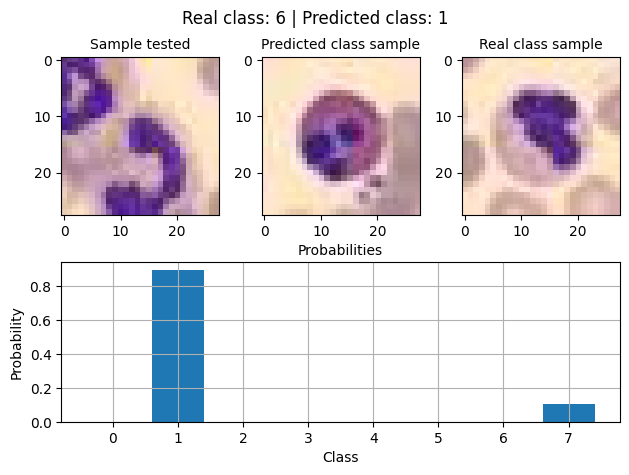

|++  36  ++|
Predicted class: 3
     Real class: 0
Probilites for each class: 
	(3, 0.67017186)
	(5, 0.18588945)
	(0, 0.13478911)
	(1, 0.0056664273)
	(6, 0.0033065644)
	(4, 0.0001547926)
	(2, 2.1857868e-05)
	(7, 7.1717317e-09)



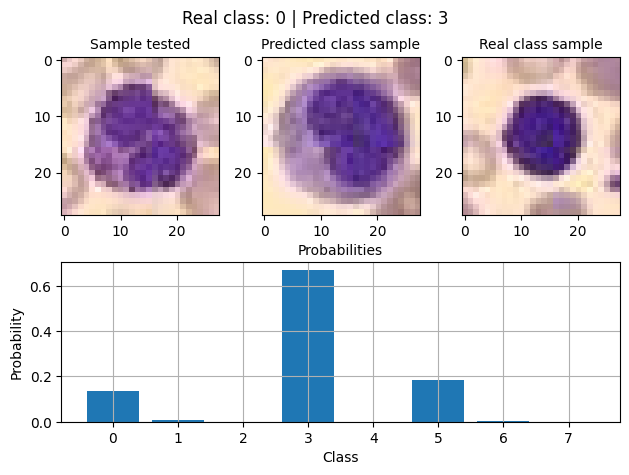

|++  0  ++|
Predicted class: 5
     Real class: 3
Probilites for each class: 
	(5, 0.7917995)
	(3, 0.20351186)
	(0, 0.002975927)
	(2, 0.00089312636)
	(4, 0.0008138479)
	(6, 5.7389434e-06)
	(1, 1.614679e-08)
	(7, 4.13011e-10)



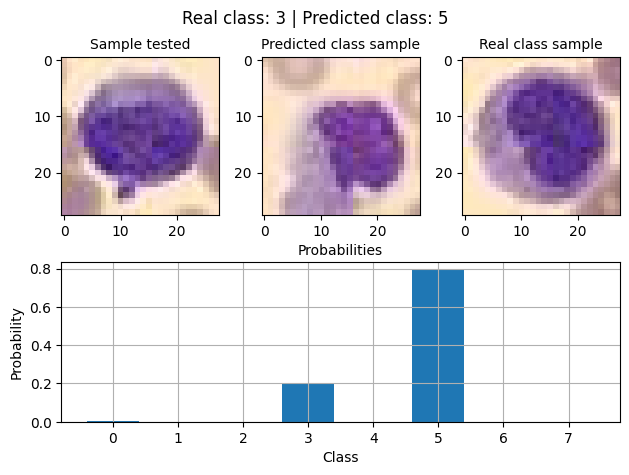

|++  62  ++|
Predicted class: 2
     Real class: 6
Probilites for each class: 
	(2, 0.9900018)
	(6, 0.009782753)
	(3, 0.00011944273)
	(7, 8.919618e-05)
	(4, 4.210182e-06)
	(5, 1.816909e-06)
	(1, 6.153389e-07)
	(0, 2.5236915e-07)



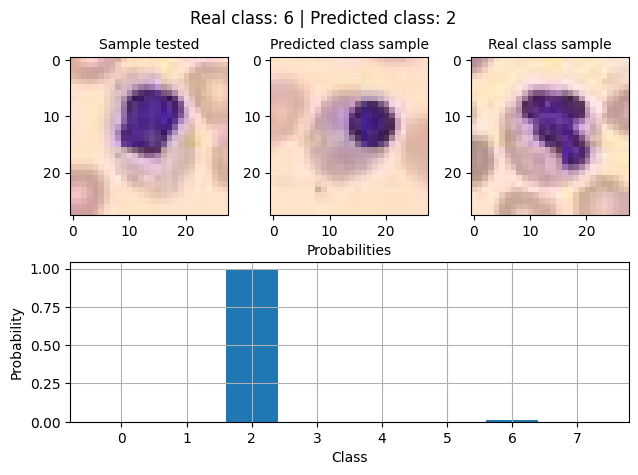

|++  88  ++|
Predicted class: 3
     Real class: 0
Probilites for each class: 
	(3, 0.4393353)
	(0, 0.36773062)
	(1, 0.12179963)
	(5, 0.07091432)
	(6, 0.00020447565)
	(4, 1.1644856e-05)
	(2, 4.0799123e-06)
	(7, 6.938377e-10)



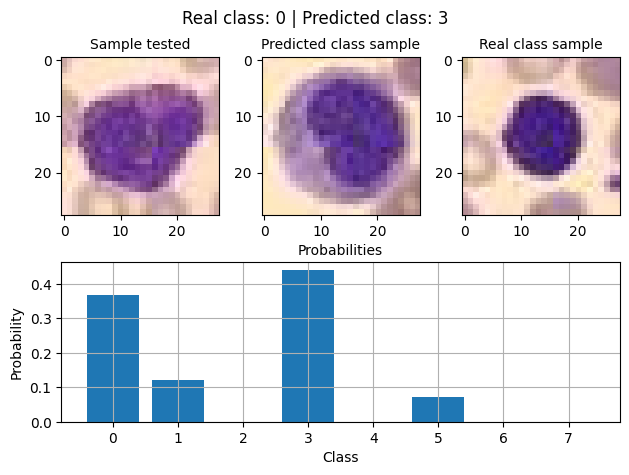

In [104]:
for i in [25, 36, 0, 62, 88]:
    if y_hat_test[i] != y_test[i]:
        print("|++  "+str(i)+"  ++|")
        print("Predicted class: "+str(y_hat_test[i]))
        print("     Real class: "+str(int(y_test[i,0])))
        prob = sorted(list(enumerate(y_hat_test_ohe[i])),key=lambda tup: tup[1], reverse=True)
        s = ""
        for j in range(8):
            s += "\t"+str(prob[j])+"\n" 
        print("Probilites for each class: \n"+s)
                
        plt.figure()        
        plt.subplot(2,3,1)
        plt.imshow(X_test[i])
        plt.title("Sample tested",fontsize=10)
        plt.subplot(2,3,2)
        plt.imshow(X_train[class_samples[y_hat_test[i]]])
        plt.title("Predicted class sample",fontsize=10)
        plt.subplot(2,3,3)
        plt.imshow(X_train[class_samples[int(y_test[i,0])]])
        plt.title("Real class sample",fontsize=10)
        plt.subplot(2,3,(4,6))
        plt.bar(x=[0, 1, 2, 3, 4, 5, 6, 7],height=y_hat_test_ohe[i])
        plt.title("Probabilities",fontsize=10)
        plt.grid()
        plt.ylabel("Probability")
        plt.xlabel("Class")
        plt.suptitle("Real class: "+str(int(y_test[i,0]))+" | Predicted class: "+str(y_hat_test[i]))
        plt.tight_layout()
        plt.savefig("../plot/mlp/error_analyser_"+str(i)+".pdf", format="pdf", bbox_inches="tight")
        plt.show()